<h1 style=font-size:50px> Euler, Verlet, and Third Order Free Fall </h1>
<p> This code produces a simulation of falling balls; from left to right Third Order, Verlet, Euler, and free fall with no air resistance. The second subplot, plots the difference between Euler and Verlet and Euler and the Third Order approximation. The lines are on top of one another, suggesting there is not appreciable difference between the third order and verlet approximations. </p>

<IPython.core.display.Javascript object>


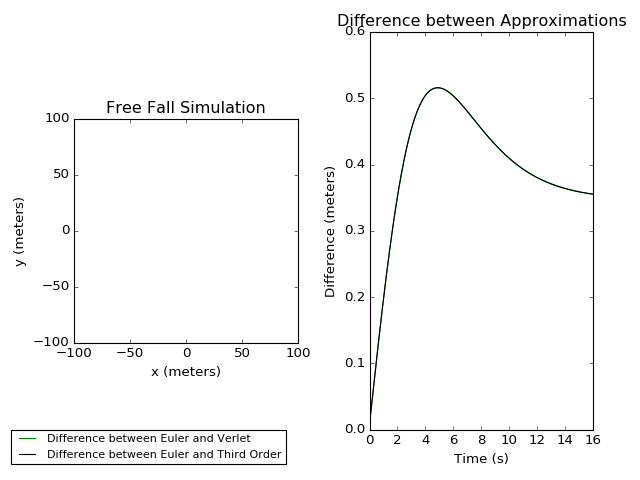

In [3]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt  # Plotting package
from matplotlib import animation
%matplotlib notebook

# Analytical Solution
dt = .04
def analyticalSolution(dt):
    values = np.arange(0,400)
    v = 0
    x0 = 45
    y0 = 100
    angle = 270
    Velocityx= v*np.cos(angle*np.pi/180.)
    Velocityy= v*np.sin(angle*np.pi/180.)
    x = (Velocityx*dt*values + x0)
    y=  (y0 + Velocityy*dt*values - (.5*9.81*(dt*values)**2))
    
    return(x,y)


# Euler Solution
def eulerSolution(dt):
    v = 0    
    C = 0.01
    g = -9.81
    rho = 1.0
    A = 1.0    
    m = 1.0
    yList = []
    xList = []
    t = 0
    y = 100
    x = 15
    values = np.arange(0,400)
    xList = (np.arange(0,400) * 0)
    for i in range(400):
        a = (1/m)*(m*g+0.5*C*rho*A*(v**2))
        v += dt*a
        y += dt*v
        yList.append(y)
        xList[i] += x
        t += dt
    return(xList, yList)

# Verlet Solution
def verletSolution(dt):
    v = 0
    yList = []
    xList = []
    t = 0
    C = 0.01
    g = -9.81
    rho = 1
    A = 1.0
    m = 1.0
    y = 100
    x = -15
    values = np.arange(0,400)
    xList = (np.arange(0,400) * 0)
    for i in range(400):
        a = (1/m)*(m*g+0.5*C*rho*A*(v**2))
        a_dot = (1/m)*(C*rho*A*v*a)
        v += dt*a + .5 * a_dot * dt**2
        y += dt*v + (.5 * a * dt**2)
        yList.append(y)
        xList[i] += x
        t += dt
    return(xList, yList)

# Third Order Solution
def thirdOrderSolution(dt):
    v = 0
    yList = []
    xList = []
    t = 0
    C = 0.01
    g = -9.81
    rho = 1
    A = 1
    m = 1
    y = 100
    x = -45
    angle = 270
    Velocityx= v*np.cos(angle*np.pi/180.)
    Velocityy= v*np.sin(angle*np.pi/180.)
    values = np.arange(0,400)
    xList = (np.arange(0,400) * 0)
    for i in range(400):
        a = (1/m)*(m*g+0.5*C*rho*A*(v**2))
        a_dot = (1/m)*(C*rho*A*v*a)
        a_ddot = (1/m)*(rho*C*A)*((a_dot*v)+a**2)
        v += (a*dt) + (.5 * a_dot * dt**2) + ((1/6) * a_ddot * dt**3)
        y += dt*v + (.5 * a * dt**2) + ((1/6) * a_dot * dt**3)
        yList.append(y)
        xList[i] += x
        t += dt
    return(xList, yList)
    

#Calling the solutions
x,y = analyticalSolution(dt)
xE, yE = eulerSolution(dt)
xV, yV = verletSolution(dt)
xT, yT = thirdOrderSolution(dt)


# Create an empty figure in which we will plot
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.set_xlim(-100, 100)
ax1.set_ylim(-100, 100)
ax1.set_xlabel("x (meters)")
ax1.set_ylabel("y (meters)")
ax1.set_aspect('equal')  # Set the aspect ratio of the figure to be equal
ax1.set_title("Free Fall Simulation")


# Initialize an empty plot.  Set the line characteristics here.
dot,    = ax1.plot([],[], color="k", marker="o", markersize = 20, label='No Air Resistance')
dotE,   = ax1.plot([],[], color="r", marker="o", markersize = 20, label='Euler Approximation')
dotV,   = ax1.plot([],[], color="g", marker="o", markersize = 20, label='Verlet Approximation')
dotT,   = ax1.plot([],[], color="y", marker="o", markersize = 20, label='Third Order Approximation')


# The animation routine requires an initialization routine, even though 
# it does the same thing as above.
def init():
    dot.set_data([], [])
    dotE.set_data([],[])
    dotV.set_data([],[])
    dotT.set_data([],[])

# Function that updates the plot, showing the data from elements 0->n
def update(n):  # n = frame counter
    # Just for same measure, make sure that we don't try to plot data
    # outside of the data range, which has 360 points.
    i = n % 400
    dot.set_data(x[i],y[i])
    dotE.set_data(xE[i],yE[i])
    dotV.set_data(xV[i],yV[i])
    dotT.set_data(xT[i],yT[i])
    #plt.imshow(image, extent=[x[i]-.05,x[i]+.05,y[i]-.05,y[i]+.05])
    #plt.imshow(image2, extent=[.9,1.,0,.1])
    plt.show()

ax2.set_title("Difference between Approximations")
ax2.set_xlabel("Time (s)")
ax2.set_ylabel("Difference (meters)")
dif1 = [i - j for i, j in zip(yE,yV)]
dif2 = [i - j for i, j in zip(yE,yT)]
ax2.plot(dt*np.arange(0,400), dif1, 'g-', label='Difference between Euler and Verlet', linewidth=1)
ax2.plot(dt*np.arange(0,400), dif2, 'k-', label='Difference between Euler and Third Order', linewidth=1)
ax2.legend(bbox_to_anchor=(-1.6, 0), loc=2, borderaxespad=0, fontsize="small")

# Function to animate the figure.
# First argument: figure to update
# Second argument: function that updates the figure
# Other arguments: initialization function, # of frames to show, 
# whether to update the whole plot, and how many milliseconds between frames.
ani = animation.FuncAnimation(fig, update, init_func=init, frames=400, interval=1)
fig.tight_layout()

